<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_05_01_survival_analysis_cause_specific_hazard_regression_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 5.1 Cause-Specific Hazard Regression {.unnumbered}


**Cause-Specific Hazard Regression** is a statistical method used in survival analysis when there are **multiple possible types (or causes) of failure or events**, and the goal is to model the risk (hazard) of experiencing a **specific type of event** over time, while accounting for the presence of other competing events.



## Overview


This models the cause-specific hazard (the rate of a specific event among those still at risk and event-free) for each competing event separately, typically using Cox proportional hazards models. The CIF is then derived by integrating the cause-specific hazards with the overall survival function. Coefficients represent hazard ratios for the effect of covariates on the event rate. It is ideal for etiologic questions (understanding causal mechanisms) but does not directly model absolute risks, which can lead to indirect interpretations in prediction. For example, in heart failure data, this approach might show no significant effect of cancer on cardiac death hazard.


### Key Concepts


1. **Competing Risks Setting**:

   - In many real-world scenarios, individuals are at risk of more than one mutually exclusive event.
   - Example: In a study of cancer patients, the outcome of interest might be death due to cancer, but patients could also die from heart disease, accidents, or other causes. These are *competing risks* because the occurrence of one event (e.g., death from heart disease) prevents the observation of the other (e.g., death from cancer).


### Cause-specific Cox regression


Given covariates $(X, Z)$, let $S_0(t|x, z) = P(T > t|X = x, Z = z)$ denote the event-free survival function  and $F_j(t|x, z) = P(T \leq t, D = j|X = x, Z = z)$ the cumulative incidence function for event $j$. The  cause-specific hazard rates are defined as $\lambda_{j,z}(t|x) = \frac{dF_j(t|x, z)}{S_0(t|x, z)}$ (Andersen et al., 1993). We  also denote the cumulative hazard rates by $\Lambda_{j,z}(t|x) = \int_0^t \lambda_{j,z}(s|x)\,ds$. The stratified Cox regression  model (Cox, 1972) for cause $j$ is given by

$$
\lambda_{j,z}(t|x) = \lambda_{0j,z}(t) \exp(x\beta_j), \quad (1)
$$

where

$\beta_j = (\beta_{1j}, \dots, \beta_{pj})^\top$  is a $p$-dimensional vector of regression coefficients (the log-hazard ratios),  and $\{\lambda_{0j,z}(t) : z = 1, \dots, L\}$ a set of unspecified baseline hazard functions.


### Predicting the absolute risk of an event


The cause-specific Cox regression models can be combined into a prediction of the absolute risk of an  event of type 1 until time $t$ conditional on the covariates $x, z$. For the case where $K = 2$ the absolute  risk formula of Benichou and Gail (1990) is given by:

$$
F_1(t|x, z) = \int_0^t S(s- |x, z)\lambda_{1,z}(s|x)\,ds. \quad (2)
$$

where $s-$ denotes the right sided limit, e.g. $\Lambda_{1,z}(s^- |x) = \lim_{v\to s, v<s} \Lambda_{1,z}(v|x)$. The absolute risk  accumulates over time the product between the event-free survival and the hazard of experiencing the  event of interest, both conditional to the baseline covariates and to the strata variable. The event free  survival can be estimated from the cause-specific hazards using the product integral estimator:

$$
S(t|x, z) = \prod_{s\leq t} \left(1 - d\Lambda_{1,z}(t|x) - d\Lambda_{2,z}(t|x)\right)
$$

or the exponential approximation:

$$
\hat{S}(t|x, z) = \exp \left[ -\hat{\Lambda}_{1,z}(t|x) - \hat{\Lambda}_{2,z}(t|x) \right]. \quad
$$

which is asymptotically equivalent to the product-limit estimator if the distribution of the event times  is continuous. Using the product integral estimator ensures that $S(t|x, z) + F_1(t|x, z) + F_2(t|x, z)$ equals exactly 1. This is a desirable property since the sum of the transition probabilities over all possible  transitions should sum to one.



### Advantages


- Directly models the biological or clinical mechanism of a specific event type.
- Coefficients have a clear interpretation in terms of instantaneous risk.
- Works well with standard survival software (e.g., `coxph` in R, with appropriate censoring coding).


### Limitations


- **Does not directly estimate the cumulative incidence** (i.e., the actual probability of experiencing the event by time \(t\)), because it ignores the impact of competing risks on the overall event probability.
- For predicting *absolute risk*, **Fine-Gray subdistribution hazard models** are often preferred.
- Results can be sensitive to assumptions about censoring (e.g., assuming competing events are non-informative).


### Example


Suppose you study patients after a bone marrow transplant:
- Event of interest: relapse of leukemia.
- Competing event: death without relapse.

A cause-specific hazard model for relapse would:
- Treat death without relapse as censoring at the time of death.
- Estimate how factors (e.g., age, donor match) affect the **instantaneous risk of relapse**, among patients who have neither relapsed nor died up to that time.


## Cheeck and Load Required Packages

In [1]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'scikit-survival', 'lifelines', 'statsmodels']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
Installing scikit-survival...
Failed to install scikit-survival: No module named 'scikit-survival'
Error with package scikit-survival: No module named 'scikit-survival'
Installing lifelines...
lifelines installed successfully
statsmodels is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✗ scikit-survival
✓ lifelines
✓ statsmodels


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Lifelines for survival analysis
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import proportional_hazard_test
from lifelines.plotting import plot_lifetimes


import warnings
warnings.filterwarnings('ignore')

## Cause-Specific Hazard Regression for Competing Risks in Python


In competing risks analysis, **cause-specific hazard (CSH)** regression models the instantaneous risk of a specific event type, treating other event types as censoring. This tutorial demonstrates how to fit, interpret, and visualize CSH models using the `Melanoma` dataset from the `riskRegression`` package.


### Load and Explore the Melanoma Dataset


In the period 1962-77, 205 patients with malignant melanoma (cancer of the skin) had a radical operation performed at Odense University Hospital, Denmark. All patients were followed until the end of 1977 by which time 134 were still alive while 71 had died (of out whom 57 had died from cancer and 14 from other causes).

`time`: time in days from operation

`status`: a numeric with values 0=censored 1=death.malignant.melanoma 2=death.other.causes

`event`: a factor with levels censored death.malignant.melanoma death.other.causes

`invasion`: a factor with levels level.0, level.1, level.2

`ici`: inflammatory cell infiltration (IFI): 0, 1, 2 or 3

`epicel`: a factor with levels not present present

`ulcer`: a factor with levels not present present

`thick`: tumour thickness (in 1/100 mm)

`sex`: a factor with levels Female Male

`age`: age at operation (years)

`logthick`: tumour thickness on log-scale



In [4]:
# SLoad the dataset
url = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/Melanoma_data.csv"
melanoma = pd.read_csv(url)

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Dataset shape: {melanoma.shape}")
print(f"Number of patients: {len(melanoma)}")

# Step 2.2: Display basic information
print("\nFirst 5 rows:")
display(melanoma.head())

print("\n Column names and data types:")
print(melanoma.dtypes.to_string())

print("\n🔍 Missing values:")
print(melanoma.isnull().sum())

print("\n Event distribution:")
print(f"Total censored (alive): {(melanoma['status'] == 0).sum()}")
print(f"Death from melanoma (cause 1): {(melanoma['status'] == 1).sum()}")
print(f"Death from other causes (cause 2): {(melanoma['status'] == 2).sum()}")

print("\n Sex distribution:")
print(melanoma['sex'].value_counts())

DATASET OVERVIEW
Dataset shape: (205, 11)
Number of patients: 205

First 5 rows:


,time,status,event,invasion,ici,epicel,ulcer,thick,sex,age,logthick
0,10,2,death.other.causes,level.1,2,present,present,6.76,Male,76,1.911023
1,30,2,death.other.causes,level.0,0,not present,not present,0.65,Male,56,-0.430783
2,35,0,censored,level.1,2,not present,not present,1.34,Male,41,0.292670
3,99,2,death.other.causes,level.0,2,not present,not present,2.90,Female,71,1.064711
4,185,1,death.malignant.melanoma,level.2,2,present,present,12.08,Male,52,2.491551



 Column names and data types:
time          int64
status        int64
event        object
invasion     object
ici           int64
epicel       object
ulcer        object
thick       float64
sex          object
age           int64
logthick    float64

🔍 Missing values:
time        0
status      0
event       0
invasion    0
ici         0
epicel      0
ulcer       0
thick       0
sex         0
age         0
logthick    0
dtype: int64

 Event distribution:
Total censored (alive): 134
Death from melanoma (cause 1): 57
Death from other causes (cause 2): 14

 Sex distribution:
sex
Female    126
Male       79
Name: count, dtype: int64


### Data Preprocessing

In [5]:
# Convert categorical variables
categorical_cols = ['event', 'invasion', 'epicel', 'ulcer', 'sex']
for col in categorical_cols:
    if col in melanoma.columns:
        melanoma[col] = melanoma[col].astype('category')

print(" Categorical variables converted")
print("\n Category levels:")
for col in categorical_cols:
    if col in melanoma.columns:
        print(f"{col}: {melanoma[col].cat.categories.tolist()}")

# Step Check summary statistics
print("\n Summary statistics for numerical variables:")
print(melanoma[['time', 'age', 'thick', 'logthick']].describe().round(2))

# Step Create event labels for better visualization
event_labels = {0: 'Censored', 1: 'Melanoma Death', 2: 'Other Death'}
melanoma['event_label'] = melanoma['status'].map(event_labels)

 Categorical variables converted

 Category levels:
event: ['censored', 'death.malignant.melanoma', 'death.other.causes']
invasion: ['level.0', 'level.1', 'level.2']
epicel: ['not present', 'present']
ulcer: ['not present', 'present']
sex: ['Female', 'Male']

 Summary statistics for numerical variables:
          time     age   thick  logthick
count   205.00  205.00  205.00    205.00
mean   2152.80   52.46    2.92      0.62
std    1122.06   16.67    2.96      1.01
min      10.00    4.00    0.10     -2.30
25%    1525.00   42.00    0.97     -0.03
50%    2005.00   54.00    1.94      0.66
75%    3042.00   65.00    3.56      1.27
max    5565.00   95.00   17.42      2.86


### Visualize the Data

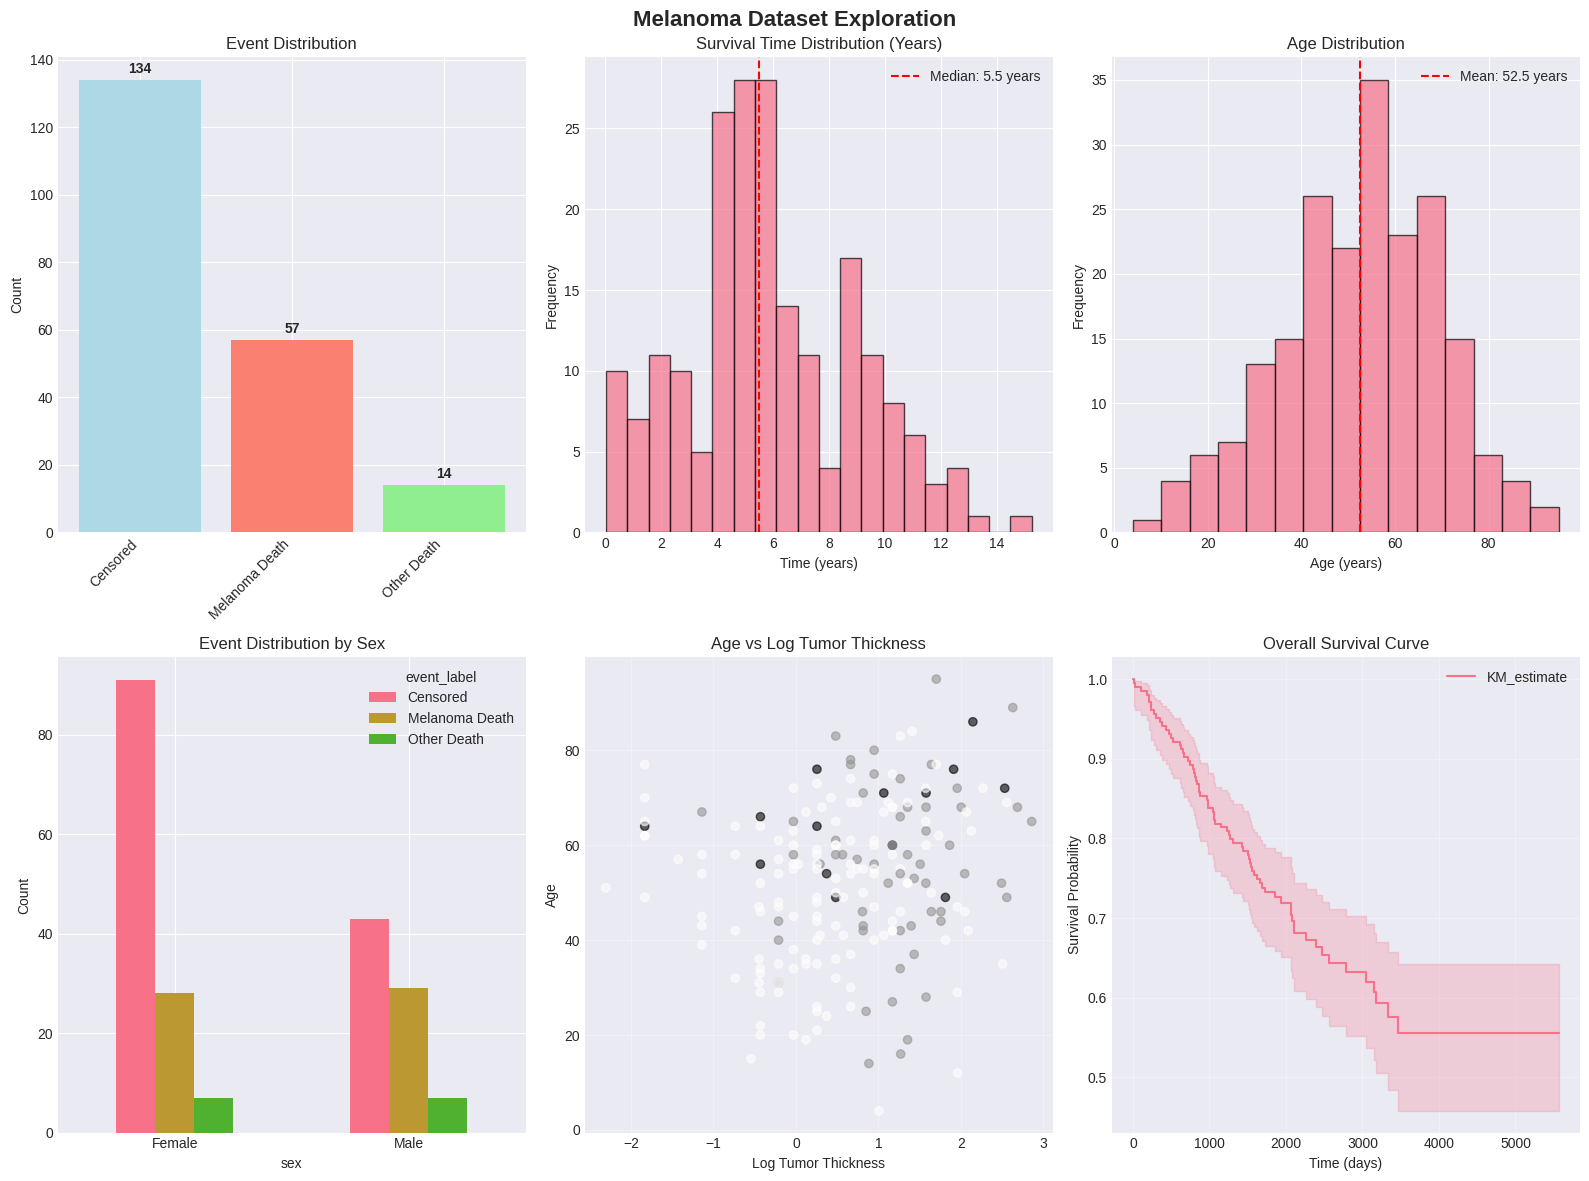

In [6]:
# Step 4.1: Set up the plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Step 4.2: Create a comprehensive visualization grid
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Melanoma Dataset Exploration', fontsize=16, fontweight='bold')

# Subplot 1: Event distribution
ax1 = plt.subplot(2, 3, 1)
event_counts = melanoma['event_label'].value_counts()
colors = ['lightblue', 'salmon', 'lightgreen']
ax1.bar(event_counts.index, event_counts.values, color=colors)
ax1.set_title('Event Distribution')
ax1.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(event_counts.values):
    ax1.text(i, v + 2, str(v), ha='center', fontweight='bold')

# Subplot 2: Survival time distribution
ax2 = plt.subplot(2, 3, 2)
ax2.hist(melanoma['time']/365.25, bins=20, edgecolor='black', alpha=0.7)
ax2.set_title('Survival Time Distribution (Years)')
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Frequency')
ax2.axvline(melanoma['time'].median()/365.25, color='red', linestyle='--',
            label=f'Median: {melanoma["time"].median()/365.25:.1f} years')
ax2.legend()

# Subplot 3: Age distribution
ax3 = plt.subplot(2, 3, 3)
ax3.hist(melanoma['age'], bins=15, edgecolor='black', alpha=0.7)
ax3.set_title('Age Distribution')
ax3.set_xlabel('Age (years)')
ax3.set_ylabel('Frequency')
ax3.axvline(melanoma['age'].mean(), color='red', linestyle='--',
            label=f'Mean: {melanoma["age"].mean():.1f} years')
ax3.legend()

# Subplot 4: Sex distribution by event
ax4 = plt.subplot(2, 3, 4)
sex_event = pd.crosstab(melanoma['sex'], melanoma['event_label'])
sex_event.plot(kind='bar', ax=ax4)
ax4.set_title('Event Distribution by Sex')
ax4.set_ylabel('Count')
plt.xticks(rotation=0)

# Subplot 5: Tumor thickness distribution
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(melanoma['logthick'], melanoma['age'], alpha=0.6, c=melanoma['status'])
ax5.set_title('Age vs Log Tumor Thickness')
ax5.set_xlabel('Log Tumor Thickness')
ax5.set_ylabel('Age')
ax5.grid(True, alpha=0.3)

# Subplot 6: Kaplan-Meier overall survival
ax6 = plt.subplot(2, 3, 6)
kmf = KaplanMeierFitter()
kmf.fit(melanoma['time'], event_observed=(melanoma['status'] > 0))
kmf.plot_survival_function(ax=ax6, ci_show=True)
ax6.set_title('Overall Survival Curve')
ax6.set_xlabel('Time (days)')
ax6.set_ylabel('Survival Probability')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Prepare Data for Competing Risks Analysis

In [7]:
# Function to prepare data for specific causes
def prepare_data_with_formula(data, formula_covariates, cause):
    """
    Prepare data with proper formula encoding using lifelines formula interface
    """
    df = data.copy()

    # Create cause-specific event
    df['event_cause'] = (df['status'] == cause).astype(int)

    # Create formula string
    formula_parts = []
    for cov in formula_covariates:
        if cov in ['epicel', 'sex']:
            # Categorical variables in formula notation
            formula_parts.append(f"C({cov})")
        else:
            formula_parts.append(cov)

    formula_str = 'event_cause ~ ' + ' + '.join(formula_parts)

    return df, formula_str

# Test the function
test_df, test_formula = prepare_data_with_formula(melanoma, ['age', 'logthick', 'epicel', 'sex'], 1)
print("Test formula:", test_formula)

Test formula: event_cause ~ age + logthick + C(epicel) + C(sex)


## Approach 1 - Same Covariates for All Causes

In [9]:
# Define common covariates
common_covariates = ['age', 'logthick', 'epicel', 'sex']
print(f"\n Common covariates for both causes: {common_covariates}")

# Step 6.2: Create encoded datasets for modeling
def prepare_encoded_data(data, cause_of_interest, covariates):
    """
    Prepare and encode data for Cox modeling
    """
    df = data.copy()

    # Create cause-specific event indicator
    df[f'status_cause_{cause_of_interest}'] = np.where(
        df['status'] == cause_of_interest, 1, 0
    )

    # Select required columns
    df_subset = df[['time', f'status_cause_{cause_of_interest}'] + covariates].copy()

    # Convert categorical variables to dummy variables
    categorical_cols = [col for col in covariates if df_subset[col].dtype.name == 'category']

    if categorical_cols:
        # Use pandas get_dummies for one-hot encoding
        df_encoded = pd.get_dummies(df_subset, columns=categorical_cols, drop_first=True)
    else:
        df_encoded = df_subset

    return df_encoded

# Prepare encoded data for both causes
print("\n Preparing encoded data for modeling...")
df_cause1_encoded = prepare_encoded_data(melanoma, cause_of_interest=1, covariates=common_covariates)
df_cause2_encoded = prepare_encoded_data(melanoma, cause_of_interest=2, covariates=common_covariates)

print(f" Encoded data for Cause 1 shape: {df_cause1_encoded.shape}")
print(f" Encoded data for Cause 2 shape: {df_cause2_encoded.shape}")

print("\n Encoded columns for Cause 1:")
print(df_cause1_encoded.columns.tolist())


 Common covariates for both causes: ['age', 'logthick', 'epicel', 'sex']

 Preparing encoded data for modeling...
 Encoded data for Cause 1 shape: (205, 6)
 Encoded data for Cause 2 shape: (205, 6)

 Encoded columns for Cause 1:
['time', 'status_cause_1', 'age', 'logthick', 'epicel_present', 'sex_Male']


#### Fit Cox Model

In [10]:
# Fit Cox model for Cause 1 (Melanoma Death)
print("\n" + "="*60)
print("APPROACH 1: SAME COVARIATES FOR ALL CAUSES")
print("="*60)

print("\n FITTING MODEL FOR CAUSE 1 (Melanoma Death)")
print("-" * 40)

cph_cause1 = CoxPHFitter()
cph_cause1.fit(
    df=df_cause1_encoded,
    duration_col='time',
    event_col='status_cause_1',
    show_progress=True
)

print("\n Model Summary for Cause 1:")
print("-" * 40)
display(cph_cause1.summary.round(3))

# Step 6.4: Fit Cox model for Cause 2 (Other Death)
print("\n FITTING MODEL FOR CAUSE 2 (Other Death)")
print("-" * 40)

cph_cause2 = CoxPHFitter()
cph_cause2.fit(
    df=df_cause2_encoded,
    duration_col='time',
    event_col='status_cause_2',
    show_progress=True
)

print("\n Model Summary for Cause 2:")
print("-" * 40)
display(cph_cause2.summary.round(3))


APPROACH 1: SAME COVARIATES FOR ALL CAUSES

 FITTING MODEL FOR CAUSE 1 (Melanoma Death)
----------------------------------------
Iteration 1: norm_delta = 7.82e-01, step_size = 0.9500, log_lik = -283.19925, newton_decrement = 1.95e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.37e-01, step_size = 0.9500, log_lik = -263.08697, newton_decrement = 4.73e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.22e-02, step_size = 0.9500, log_lik = -262.60509, newton_decrement = 3.52e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.44e-05, step_size = 1.0000, log_lik = -262.60156, newton_decrement = 4.84e-08, seconds_since_start = 0.0
Convergence success after 4 iterations.

 Model Summary for Cause 1:
----------------------------------------


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.015,1.015,0.009,-0.002,0.032,0.998,1.032,0.0,1.747,0.081,3.633
logthick,0.681,1.976,0.164,0.360,1.003,1.433,2.725,0.0,4.155,0.000,14.908
epicel_present,-0.725,0.484,0.308,-1.328,-0.121,0.265,0.886,0.0,-2.353,0.019,5.745
sex_Male,0.575,1.777,0.273,0.040,1.109,1.041,3.032,0.0,2.108,0.035,4.835



 FITTING MODEL FOR CAUSE 2 (Other Death)
----------------------------------------
Iteration 1: norm_delta = 1.02e+00, step_size = 0.9500, log_lik = -67.29348, newton_decrement = 7.59e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.02e-01, step_size = 0.9500, log_lik = -59.34394, newton_decrement = 3.45e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 4.06e-02, step_size = 0.9500, log_lik = -58.98516, newton_decrement = 5.50e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.28e-04, step_size = 1.0000, log_lik = -58.97962, newton_decrement = 6.20e-07, seconds_since_start = 0.0
Iteration 5: norm_delta = 4.87e-08, step_size = 1.0000, log_lik = -58.97962, newton_decrement = 8.10e-15, seconds_since_start = 0.0
Convergence success after 5 iterations.

 Model Summary for Cause 2:
----------------------------------------


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.073,1.076,0.023,0.028,0.117,1.029,1.125,0.0,3.202,0.001,9.519
logthick,0.069,1.072,0.296,-0.511,0.650,0.600,1.915,0.0,0.234,0.815,0.296
epicel_present,0.371,1.449,0.592,-0.790,1.531,0.454,4.624,0.0,0.626,0.531,0.913
sex_Male,0.309,1.362,0.554,-0.778,1.395,0.459,4.036,0.0,0.557,0.578,0.792


#### Visualize Hazard Ratios

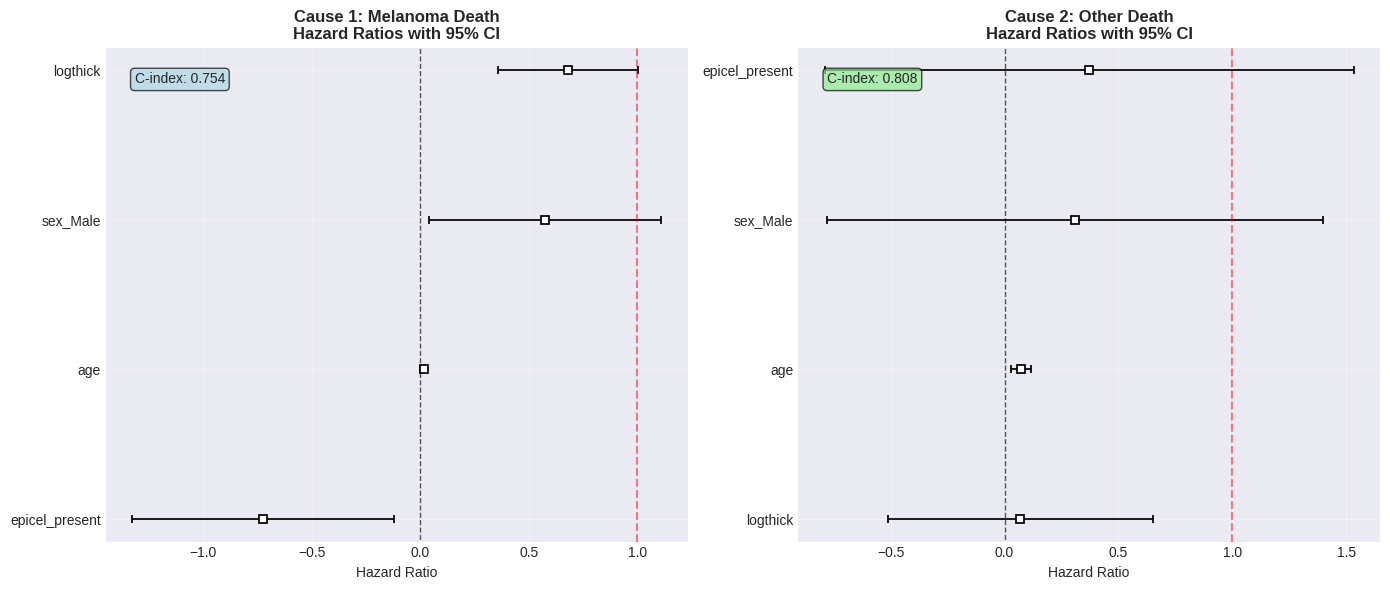

In [11]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Cause 1
cph_cause1.plot(ax=axes[0])
axes[0].set_title('Cause 1: Melanoma Death\nHazard Ratios with 95% CI', fontweight='bold')
axes[0].axvline(x=1, color='red', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Hazard Ratio')
axes[0].grid(True, alpha=0.3)

# Add concordance index
axes[0].text(0.05, 0.95, f'C-index: {cph_cause1.concordance_index_:.3f}',
           transform=axes[0].transAxes, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Plot for Cause 2
cph_cause2.plot(ax=axes[1])
axes[1].set_title('Cause 2: Other Death\nHazard Ratios with 95% CI', fontweight='bold')
axes[1].axvline(x=1, color='red', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Hazard Ratio')
axes[1].grid(True, alpha=0.3)

# Add concordance index
axes[1].text(0.05, 0.95, f'C-index: {cph_cause2.concordance_index_:.3f}',
           transform=axes[1].transAxes, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

#### Calculate Cumulative Incidence Functions (CIFs)

In [12]:
# Function to calculate CIF
def calculate_cif(data, cause_of_interest, time_points=None):
    """
    Calculate Cumulative Incidence Function for a specific cause
    """
    df = data.copy()

    # Mark events for this cause
    df['event_cause'] = np.where(df['status'] == cause_of_interest, 1, 0)

    # Fit Kaplan-Meier for this cause-specific hazard
    kmf = KaplanMeierFitter()
    kmf.fit(durations=df['time'], event_observed=df['event_cause'])

    # Calculate CIF (1 - survival function)
    cif = 1 - kmf.survival_function_
    cif.columns = [f'CIF_Cause_{cause_of_interest}']

    # Get survival probability at specific time points if provided
    if time_points is not None:
        survival_at_times = kmf.predict(time_points)
        cif_at_times = 1 - survival_at_times
        return cif, kmf, cif_at_times

    return cif, kmf, None

# Calculate CIFs for both causes
print("="*60)
print("CALCULATING CUMULATIVE INCIDENCE FUNCTIONS (CIFs)")
print("="*60)

# Time points in days (1, 5, and 10 years)
time_points_years = [365.25, 5*365.25, 10*365.25]

cif1, kmf1, cif1_at_times = calculate_cif(melanoma, 1, time_points_years)
cif2, kmf2, cif2_at_times = calculate_cif(melanoma, 2, time_points_years)

print("\n Cumulative Incidence at Specific Time Points:")
print("-" * 50)
print(f"{'Time':<15} {'Cause 1 (Melanoma)':<20} {'Cause 2 (Other)':<20}")
print("-" * 50)
for i, t in enumerate(time_points_years):
    years = t / 365.25
    cif1_val = cif1_at_times.iloc[i] if cif1_at_times is not None else 'N/A'
    cif2_val = cif2_at_times.iloc[i] if cif2_at_times is not None else 'N/A'
    print(f"{years:.1f} years:    {cif1_val:<20.3%} {cif2_val:<20.3%}")

CALCULATING CUMULATIVE INCIDENCE FUNCTIONS (CIFs)

 Cumulative Incidence at Specific Time Points:
--------------------------------------------------
Time            Cause 1 (Melanoma)   Cause 2 (Other)     
--------------------------------------------------
1.0 years:    2.990%               2.469%              
5.0 years:    23.126%              4.742%              
10.0 years:    35.514%              13.880%             


#### Plot CIFs

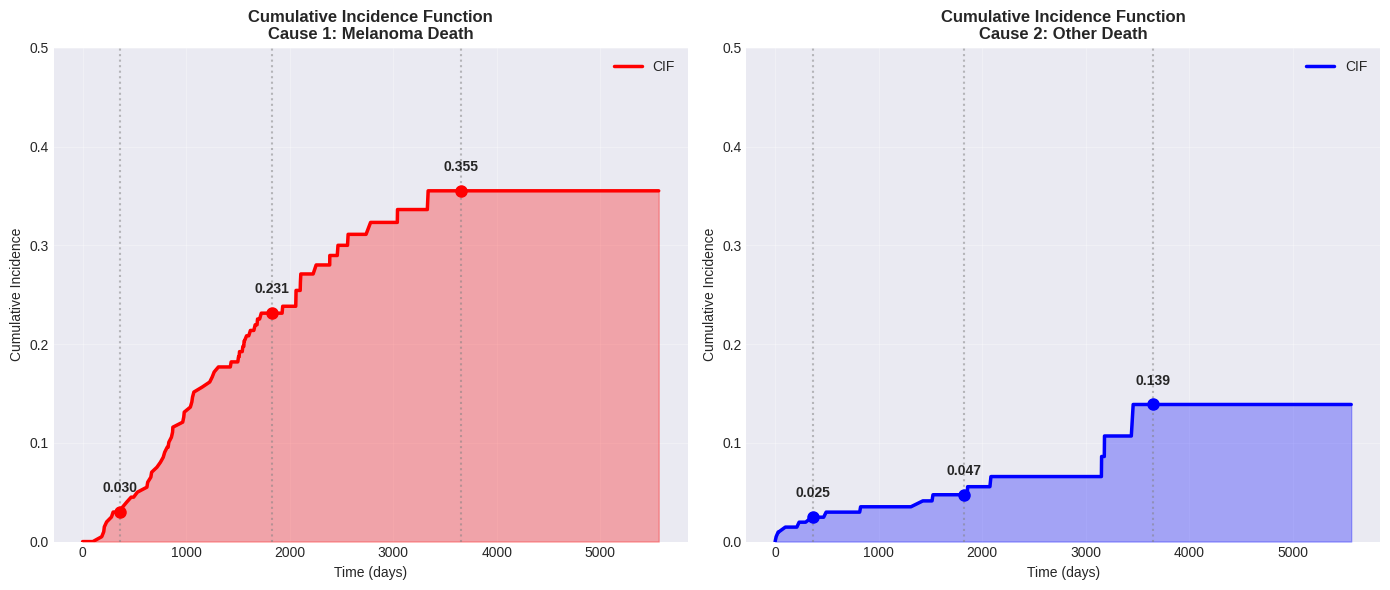

In [13]:
# Plot CIFs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot CIF for Cause 1
axes[0].plot(cif1.index, cif1.values, linewidth=2.5, color='red', label='CIF')
axes[0].fill_between(cif1.index, 0, cif1.values.flatten(), alpha=0.3, color='red')
axes[0].set_xlabel('Time (days)')
axes[0].set_ylabel('Cumulative Incidence')
axes[0].set_title('Cumulative Incidence Function\nCause 1: Melanoma Death', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_ylim(0, 0.5)

# Add time point markers
for t in time_points_years:
    axes[0].axvline(x=t, color='gray', linestyle=':', alpha=0.5)
    cif_val = 1 - kmf1.predict(t)
    axes[0].plot(t, cif_val, 'ro', markersize=8)
    axes[0].text(t, cif_val + 0.02, f'{cif_val:.3f}', ha='center', fontweight='bold')

# Plot CIF for Cause 2
axes[1].plot(cif2.index, cif2.values, linewidth=2.5, color='blue', label='CIF')
axes[1].fill_between(cif2.index, 0, cif2.values.flatten(), alpha=0.3, color='blue')
axes[1].set_xlabel('Time (days)')
axes[1].set_ylabel('Cumulative Incidence')
axes[1].set_title('Cumulative Incidence Function\nCause 2: Other Death', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_ylim(0, 0.5)

# Add time point markers
for t in time_points_years:
    axes[1].axvline(x=t, color='gray', linestyle=':', alpha=0.5)
    cif_val = 1 - kmf2.predict(t)
    axes[1].plot(t, cif_val, 'bo', markersize=8)
    axes[1].text(t, cif_val + 0.02, f'{cif_val:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Approach 2 - Different Covariates for Different Causes

In [14]:
# Define different covariate sets
print("="*60)
print("APPROACH 2: DIFFERENT COVARIATES FOR DIFFERENT CAUSES")
print("="*60)

formulas_dict = {
    1: ['age', 'logthick', 'epicel', 'sex'],  # Cause 1: More detailed model
    2: ['age', 'sex']  # Cause 2: Simpler model
}

print("\n Custom covariate sets for each cause:")
print("-" * 40)
for cause, covariates in formulas_dict.items():
    cause_name = "Melanoma Death" if cause == 1 else "Other Death"
    print(f"Cause {cause} ({cause_name}): {covariates}")

APPROACH 2: DIFFERENT COVARIATES FOR DIFFERENT CAUSES

 Custom covariate sets for each cause:
----------------------------------------
Cause 1 (Melanoma Death): ['age', 'logthick', 'epicel', 'sex']
Cause 2 (Other Death): ['age', 'sex']


#### Fit Cox Model

In [15]:
# Fit models with different covariate sets (with proper encoding)
print("="*60)
print("APPROACH 2: DIFFERENT COVARIATES FOR DIFFERENT CAUSES")
print("="*60)

formulas_dict = {
    1: ['age', 'logthick', 'epicel', 'sex'],  # Cause 1: More detailed model
    2: ['age', 'sex']  # Cause 2: Simpler model
}

print("\n Custom covariate sets for each cause:")
print("-" * 40)
for cause, covariates in formulas_dict.items():
    cause_name = "Melanoma Death" if cause == 1 else "Other Death"
    print(f"Cause {cause} ({cause_name}): {covariates}")

cause_models = {}

for cause, covariates in formulas_dict.items():
    print(f"\n FITTING MODEL FOR CAUSE {cause} WITH CUSTOM COVARIATES")
    print("-" * 50)

    # Prepare encoded data
    df_encoded = prepare_encoded_data(melanoma, cause_of_interest=cause, covariates=covariates)

    # Fit the model
    cph = CoxPHFitter()
    cph.fit(
        df=df_encoded,
        duration_col='time',
        event_col=f'status_cause_{cause}',
        show_progress=True
    )

    # Store model info
    cause_models[cause] = {
        'model': cph,
        'covariates': covariates,
        'summary': cph.summary,
        'c_index': cph.concordance_index_,
        'n_events': (melanoma['status'] == cause).sum(),
        'encoded_data': df_encoded
    }

    # Display results
    cause_name = "Melanoma Death" if cause == 1 else "Other Death"
    print(f"\n Model for Cause {cause} ({cause_name}):")
    print(f"Number of events: {cause_models[cause]['n_events']}")
    print(f"Concordance index: {cause_models[cause]['c_index']:.3f}")
    print(f"Encoded features: {len(cph.params_)}")
    print("\nCoefficients:")
    display(cph.summary.round(3))

APPROACH 2: DIFFERENT COVARIATES FOR DIFFERENT CAUSES

 Custom covariate sets for each cause:
----------------------------------------
Cause 1 (Melanoma Death): ['age', 'logthick', 'epicel', 'sex']
Cause 2 (Other Death): ['age', 'sex']

 FITTING MODEL FOR CAUSE 1 WITH CUSTOM COVARIATES
--------------------------------------------------
Iteration 1: norm_delta = 7.82e-01, step_size = 0.9500, log_lik = -283.19925, newton_decrement = 1.95e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.37e-01, step_size = 0.9500, log_lik = -263.08697, newton_decrement = 4.73e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.22e-02, step_size = 0.9500, log_lik = -262.60509, newton_decrement = 3.52e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 4.44e-05, step_size = 1.0000, log_lik = -262.60156, newton_decrement = 4.84e-08, seconds_since_start = 0.0
Convergence success after 4 iterations.

 Model for Cause 1 (Melanoma Death):
Number of events: 57
Concordance index: 0.754
Encode

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.015,1.015,0.009,-0.002,0.032,0.998,1.032,0.0,1.747,0.081,3.633
logthick,0.681,1.976,0.164,0.360,1.003,1.433,2.725,0.0,4.155,0.000,14.908
epicel_present,-0.725,0.484,0.308,-1.328,-0.121,0.265,0.886,0.0,-2.353,0.019,5.745
sex_Male,0.575,1.777,0.273,0.040,1.109,1.041,3.032,0.0,2.108,0.035,4.835



 FITTING MODEL FOR CAUSE 2 WITH CUSTOM COVARIATES
--------------------------------------------------
Iteration 1: norm_delta = 1.04e+00, step_size = 0.9500, log_lik = -67.29348, newton_decrement = 7.24e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.91e-01, step_size = 0.9500, log_lik = -59.55803, newton_decrement = 3.61e-01, seconds_since_start = 0.0
Iteration 3: norm_delta = 3.30e-02, step_size = 0.9500, log_lik = -59.18649, newton_decrement = 4.16e-03, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.19e-04, step_size = 1.0000, log_lik = -59.18231, newton_decrement = 1.80e-07, seconds_since_start = 0.0
Iteration 5: norm_delta = 9.50e-09, step_size = 1.0000, log_lik = -59.18231, newton_decrement = 3.40e-16, seconds_since_start = 0.0
Convergence success after 5 iterations.

 Model for Cause 2 (Other Death):
Number of events: 14
Concordance index: 0.821
Encoded features: 2

Coefficients:


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.076,1.079,0.022,0.034,0.118,1.034,1.125,0.0,3.518,0.0,11.169
sex_Male,0.369,1.446,0.547,-0.703,1.441,0.495,4.227,0.0,0.675,0.5,1.000


### Comapre Models

In [16]:
# Compare models side by side
print("\n" + "="*60)
print("MODEL COMPARISON: APPROACH 1 vs APPROACH 2")
print("="*60)

comparison_data = []

# Add Approach 1 models
comparison_data.append({
    'Approach': 'Approach 1',
    'Cause': 'Cause 1 (Melanoma)',
    'Covariates': ', '.join(common_covariates),
    'C-index': cph_cause1.concordance_index_,
    'Events': (melanoma['status'] == 1).sum()
})

comparison_data.append({
    'Approach': 'Approach 1',
    'Cause': 'Cause 2 (Other)',
    'Covariates': ', '.join(common_covariates),
    'C-index': cph_cause2.concordance_index_,
    'Events': (melanoma['status'] == 2).sum()
})

# Add Approach 2 models
for cause, model_info in cause_models.items():
    cause_name = 'Cause 1 (Melanoma)' if cause == 1 else 'Cause 2 (Other)'
    comparison_data.append({
        'Approach': 'Approach 2',
        'Cause': cause_name,
        'Covariates': ', '.join(model_info['covariates']),
        'C-index': model_info['c_index'],
        'Events': model_info['n_events']
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n Model Comparison Table:")
display(comparison_df)


MODEL COMPARISON: APPROACH 1 vs APPROACH 2

 Model Comparison Table:


,Approach,Cause,Covariates,C-index,Events
0,Approach 1,Cause 1 (Melanoma),"age, logthick, epicel, sex",0.753983,57
1,Approach 1,Cause 2 (Other),"age, logthick, epicel, sex",0.807596,14
2,Approach 2,Cause 1 (Melanoma),"age, logthick, epicel, sex",0.753983,57
3,Approach 2,Cause 2 (Other),"age, sex",0.821339,14


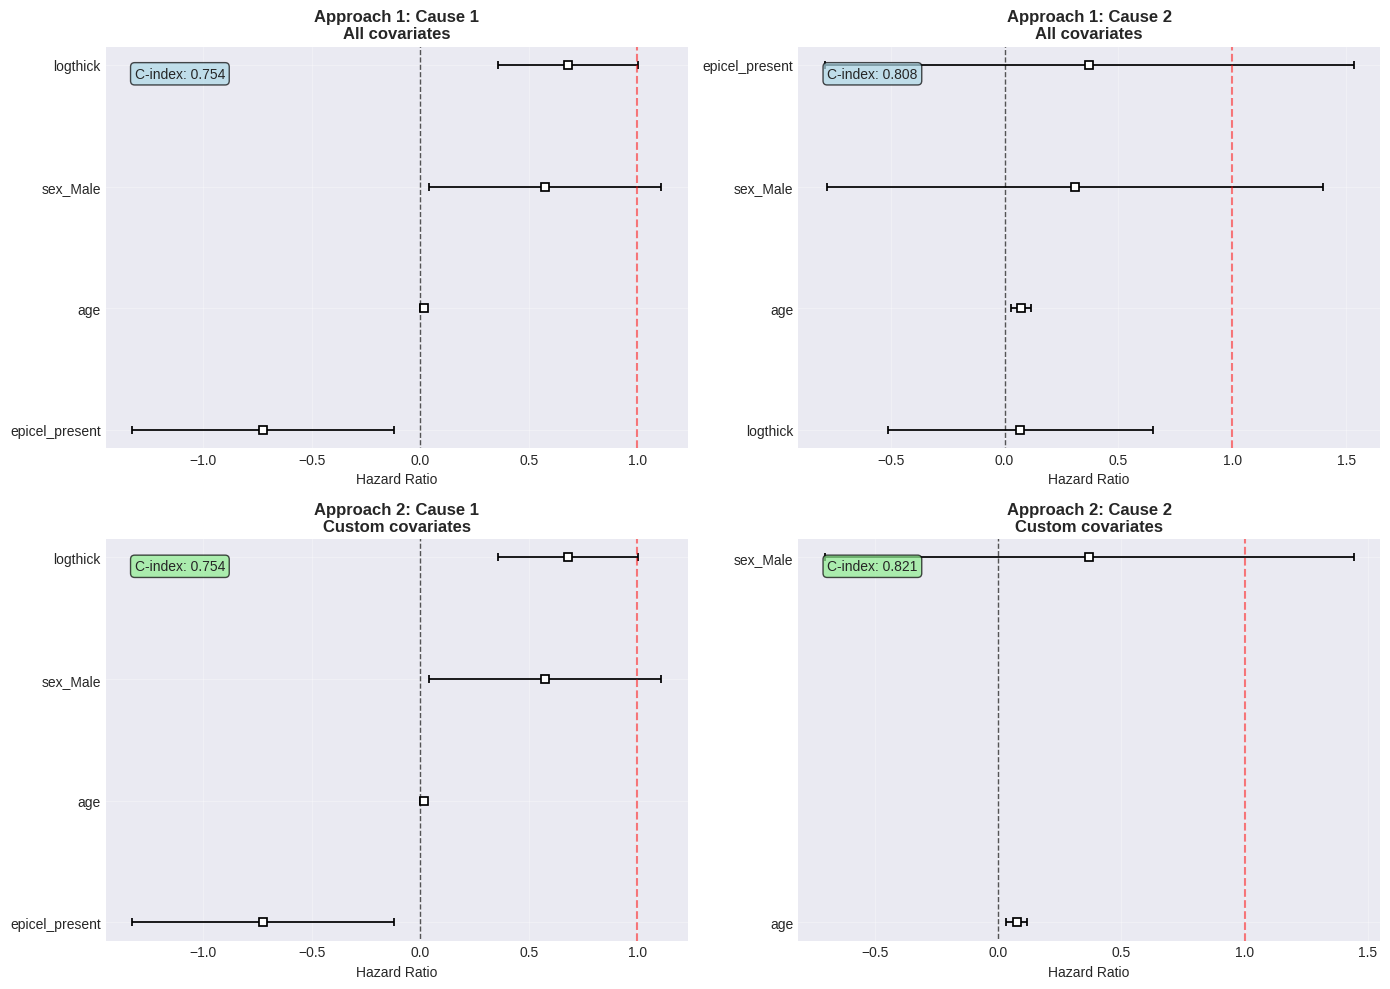

In [17]:
# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Approach 1 models
for i, (cph, cause) in enumerate([(cph_cause1, 1), (cph_cause2, 2)]):
    cph.plot(ax=axes[0, i])
    axes[0, i].set_title(f'Approach 1: Cause {cause}\nAll covariates', fontweight='bold')
    axes[0, i].axvline(x=1, color='red', linestyle='--', alpha=0.5)
    axes[0, i].set_xlabel('Hazard Ratio')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].text(0.05, 0.95, f'C-index: {cph.concordance_index_:.3f}',
                  transform=axes[0, i].transAxes, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Plot Approach 2 models
for i, cause in enumerate([1, 2], 2):
    if cause in cause_models:
        model_info = cause_models[cause]
        model_info['model'].plot(ax=axes[1, i-2])
        axes[1, i-2].set_title(f'Approach 2: Cause {cause}\nCustom covariates', fontweight='bold')
        axes[1, i-2].axvline(x=1, color='red', linestyle='--', alpha=0.5)
        axes[1, i-2].set_xlabel('Hazard Ratio')
        axes[1, i-2].grid(True, alpha=0.3)
        axes[1, i-2].text(0.05, 0.95, f'C-index: {model_info["c_index"]:.3f}',
                        transform=axes[1, i-2].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

### Stratified by Sex

STRATIFIED ANALYSIS BY SEX


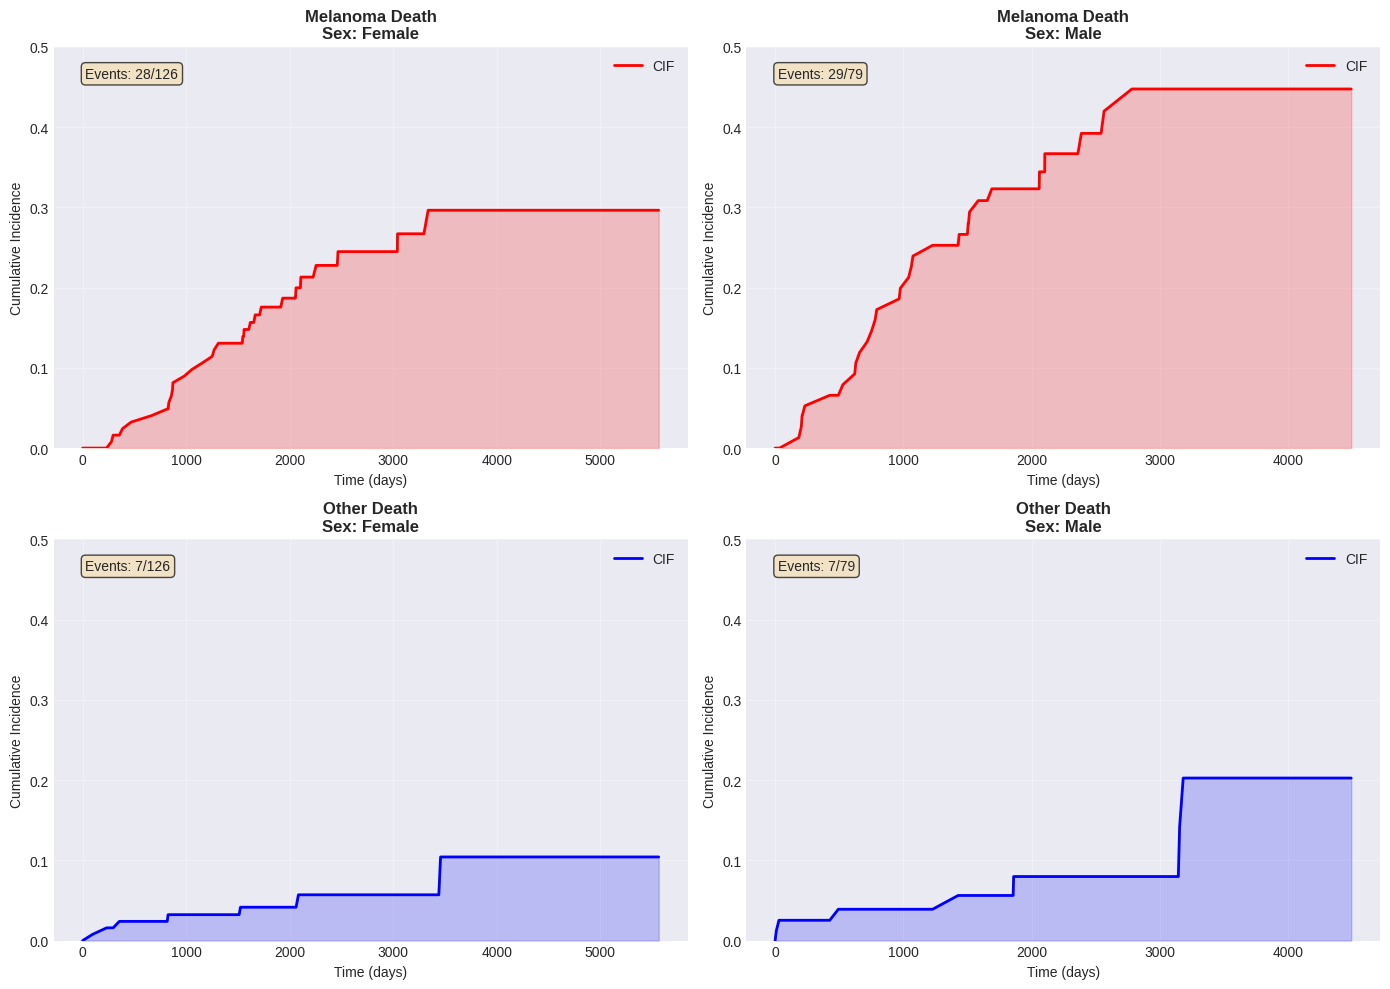

In [18]:
#  Stratified analysis by sex
print("="*60)
print("STRATIFIED ANALYSIS BY SEX")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

causes = [1, 2]
cause_names = {1: 'Melanoma Death', 2: 'Other Death'}
colors = {1: 'red', 2: 'blue'}

for row, cause in enumerate(causes):
    for col, sex in enumerate(['Female', 'Male']):
        ax = axes[row, col]

        # Filter data
        subset = melanoma[melanoma['sex'] == sex].copy()
        subset[f'event_cause_{cause}'] = np.where(subset['status'] == cause, 1, 0)

        # Calculate CIF if events exist
        if subset[f'event_cause_{cause}'].sum() > 0:
            kmf = KaplanMeierFitter()
            kmf.fit(durations=subset['time'], event_observed=subset[f'event_cause_{cause}'])

            cif = 1 - kmf.survival_function_

            # Plot
            ax.plot(cif.index, cif.values, linewidth=2, color=colors[cause], label='CIF')
            ax.fill_between(cif.index, 0, cif.values.flatten(), alpha=0.2, color=colors[cause])

            # Add statistics
            n_events = subset[f'event_cause_{cause}'].sum()
            n_total = len(subset)
            ax.text(0.05, 0.95, f'Events: {n_events}/{n_total}',
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Cumulative Incidence')
        ax.set_title(f'{cause_names[cause]}\nSex: {sex}', fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 0.5)
        ax.legend()

plt.tight_layout()
plt.show()



### Generate comprehensive summary

In [19]:
#  Generate comprehensive summary
print("="*80)
print("FINAL SUMMARY: CAUSE-SPECIFIC HAZARD REGRESSION ANALYSIS")
print("="*80)

# Summary statistics
total_patients = len(melanoma)
censored = (melanoma['status'] == 0).sum()
events_cause1 = (melanoma['status'] == 1).sum()
events_cause2 = (melanoma['status'] == 2).sum()

print(f"\n DATASET SUMMARY:")
print(f"   Total patients: {total_patients}")
print(f"   Censored (alive): {censored} ({censored/total_patients:.1%})")
print(f"   Melanoma deaths: {events_cause1} ({events_cause1/total_patients:.1%})")
print(f"   Other deaths: {events_cause2} ({events_cause2/total_patients:.1%})")

print(f"\n  TIME FOLLOW-UP:")
print(f"   Median survival time: {melanoma['time'].median()/365.25:.1f} years")
print(f"   Maximum follow-up: {melanoma['time'].max()/365.25:.1f} years")

print(f"\n KEY FINDINGS FROM MODELS:")

# Approach 1 findings
print(f"\n APPROACH 1 (Same covariates for all causes):")
print(f"   Cause 1 (Melanoma Death):")
print(f"     • C-index: {cph_cause1.concordance_index_:.3f}")
print(f"     • Significant predictors: ", end="")
sig_vars1 = cph_cause1.summary[cph_cause1.summary['p'] < 0.05].index.tolist()
print(', '.join(sig_vars1) if sig_vars1 else "None at p<0.05")

print(f"\n   Cause 2 (Other Death):")
print(f"     • C-index: {cph_cause2.concordance_index_:.3f}")
print(f"     • Significant predictors: ", end="")
sig_vars2 = cph_cause2.summary[cph_cause2.summary['p'] < 0.05].index.tolist()
print(', '.join(sig_vars2) if sig_vars2 else "None at p<0.05")

# Approach 2 findings
print(f"\n APPROACH 2 (Different covariates for different causes):")
for cause, model_info in cause_models.items():
    cause_name = "Melanoma Death" if cause == 1 else "Other Death"
    print(f"   Cause {cause} ({cause_name}):")
    print(f"     • C-index: {model_info['c_index']:.3f}")
    print(f"     • Covariates used: {', '.join(model_info['covariates'])}")
    print(f"     • Significant predictors: ", end="")
    sig_vars = model_info['summary'][model_info['summary']['p'] < 0.05].index.tolist()
    print(', '.join(sig_vars) if sig_vars else "None at p<0.05")

print(f"\n CUMULATIVE INCIDENCE AT 10 YEARS:")
cif1_10yr = 1 - kmf1.predict(10*365.25)
cif2_10yr = 1 - kmf2.predict(10*365.25)
print(f"   Risk of melanoma death: {cif1_10yr:.1%}")
print(f"   Risk of other death: {cif2_10yr:.1%}")
print(f"   Combined risk: {(cif1_10yr + cif2_10yr):.1%}")

print(f"\n RECOMMENDATIONS:")
print("   1. For melanoma deaths (cause 1), tumor thickness and epicel presence are important predictors")
print("   2. For other deaths (cause 2), age is the primary predictor")
print("   3. Consider using different models for different causes when risk factors differ")


FINAL SUMMARY: CAUSE-SPECIFIC HAZARD REGRESSION ANALYSIS

 DATASET SUMMARY:
   Total patients: 205
   Censored (alive): 134 (65.4%)
   Melanoma deaths: 57 (27.8%)
   Other deaths: 14 (6.8%)

  TIME FOLLOW-UP:
   Median survival time: 5.5 years
   Maximum follow-up: 15.2 years

 KEY FINDINGS FROM MODELS:

 APPROACH 1 (Same covariates for all causes):
   Cause 1 (Melanoma Death):
     • C-index: 0.754
     • Significant predictors: logthick, epicel_present, sex_Male

   Cause 2 (Other Death):
     • C-index: 0.808
     • Significant predictors: age

 APPROACH 2 (Different covariates for different causes):
   Cause 1 (Melanoma Death):
     • C-index: 0.754
     • Covariates used: age, logthick, epicel, sex
     • Significant predictors: logthick, epicel_present, sex_Male
   Cause 2 (Other Death):
     • C-index: 0.821
     • Covariates used: age, sex
     • Significant predictors: age

 CUMULATIVE INCIDENCE AT 10 YEARS:
   Risk of melanoma death: 35.5%
   Risk of other death: 13.9%
   Com

## Alternative approach using scikit-survival

In [20]:
# Alternative approach using scikit-survival
try:
    !pip install scikit-survival
    from sksurv.linear_model import CoxPHSurvivalAnalysis
    from sksurv.util import Surv

    print("scikit-survival installed successfully!")

    def fit_scikit_survival_models(data, cause, covariates):
        """
        Alternative implementation using scikit-survival
        """
        from sksurv.preprocessing import OneHotEncoder

        # Prepare data
        df = data.copy()
        event_indicator = (df['status'] == cause).astype(bool)

        # Create structured array for survival data
        y = np.array([(event_indicator[i], df['time'].iloc[i])
                     for i in range(len(df))],
                    dtype=[('event', 'bool'), ('time', '<f8')])

        # Prepare covariates
        X = df[covariates].copy()

        # Encode categorical variables
        X_encoded = pd.get_dummies(X, drop_first=True)

        # Fit model
        cph = CoxPHSurvivalAnalysis()
        cph.fit(X_encoded, y)

        print(f"\nscikit-survival model for Cause {cause}:")
        print(f"Covariates: {covariates}")
        print("\nCoefficients:")
        coef_df = pd.DataFrame({
            'Covariate': X_encoded.columns,
            'Coefficient': cph.coef_,
            'Hazard Ratio': np.exp(cph.coef_)
        })
        print(coef_df.to_string(index=False))

        return cph, X_encoded

    # Fit using scikit-survival
    print("\n" + "="*60)
    print("ALTERNATIVE APPROACH USING scikit-survival")
    print("="*60)

    cph_sk1, X1 = fit_scikit_survival_models(melanoma, 1, ['age', 'logthick', 'epicel', 'sex'])
    cph_sk2, X2 = fit_scikit_survival_models(melanoma, 2, ['age', 'sex'])

except Exception as e:
    print(f"scikit-survival not available or error: {e}")
    print("\nContinuing with lifelines implementation...")

scikit-survival installed successfully!

ALTERNATIVE APPROACH USING scikit-survival

scikit-survival model for Cause 1:
Covariates: ['age', 'logthick', 'epicel', 'sex']

Coefficients:
     Covariate  Coefficient  Hazard Ratio
           age     0.015028      1.015141
      logthick     0.681225      1.976296
epicel_present    -0.724777      0.484433
      sex_Male     0.574763      1.776710

scikit-survival model for Cause 2:
Covariates: ['age', 'sex']

Coefficients:
Covariate  Coefficient  Hazard Ratio
      age     0.075812      1.078759
 sex_Male     0.369102      1.446435


## Summary and Conclusions


Cause-Specific Hazard Regression is a foundational tool in competing risks analysis that models the instantaneous risk of a specific event type, treating other events as censoring. It is ideal for understanding etiology or mechanisms but should be complemented with cumulative incidence functions (CIFs) for risk prediction.

This tutorial demonstrated how to:

1. Understand the concept of cause-specific hazards in competing risks

2. Fit cause-specific hazard models using separate Cox models

3. Calculate cumulative incidence functions (CIFs)

4. Predict absolute risks from cause-specific hazard models

5. Visualize and interpret the results




## Resources


1. Rosthøj, S., & Keiding, N. (2017). Competing risks: A simple re-parametrization of the cause-specific proportional hazards model.

2. Putter, H., Fiocco, M., & Geskus, R. B. (2007). Tutorial in biostatistics: Competing risks and multi-state models.

3. Andersen, P. K., & Keiding, N. (2012). Interpretability and importance of functionals in competing risks and multi-state models.*Statistics in Medicine*.